In [5]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
from data_scripts import *

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}

sns.set_theme(
    # context="talk",
    context="paper",
    # rc={"figure.figsize": (8, 6)},
    palette="bright",
    style="whitegrid",
    rc=tex_fonts,
)

NUM_SIMS = 3
CONVERGED = False


data = {
    r"$L = L_{\mathrm{min}}$": load_data("poro_l0", n_newest=NUM_SIMS),
    r"$L = L_{\mathrm{phys}}$": load_data("poro_l1", n_newest=NUM_SIMS),
    "Dynamic": load_data("poro_ldynamic", n_newest=NUM_SIMS),
    "Random": load_data("poro_lrandom", n_newest=NUM_SIMS),
}


save_media_path = None

Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/1/performance/poro_l0_10.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/1/performance/poro_l0_11.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/1/performance/poro_l0_12.npy
Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/1/performance/poro_l1_7.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/1/performance/poro_l1_8.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/1/performance/poro_l1_9.npy
Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/1/performance/poro_ldynamic_7.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/1/performance/poro_ldynamic_8.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/1/performance/poro_ldynamic_9.npy
Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/

$L = L_{\mathrm{min}}$ 0


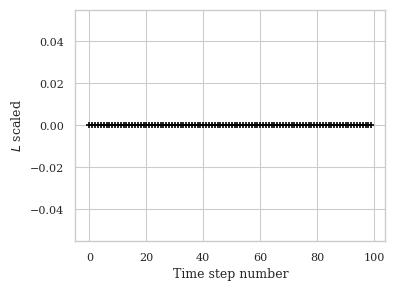

$L = L_{\mathrm{min}}$ 1


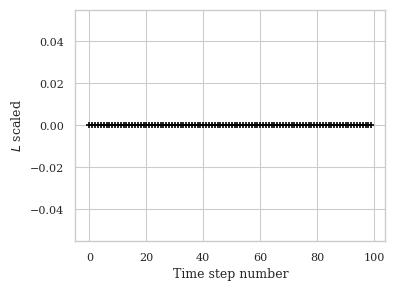

$L = L_{\mathrm{min}}$ 2


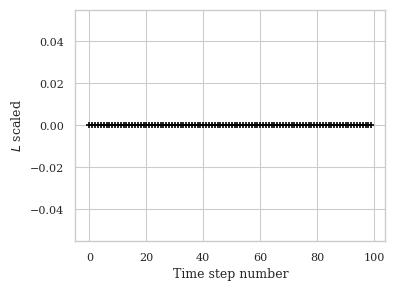

$L = L_{\mathrm{phys}}$ 0


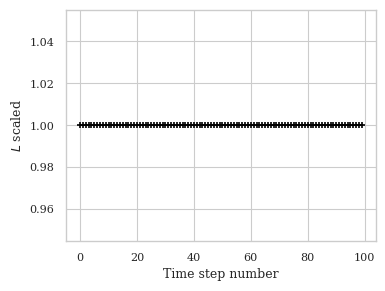

$L = L_{\mathrm{phys}}$ 1


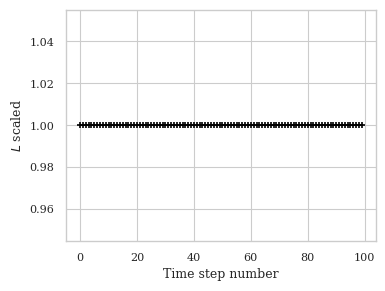

$L = L_{\mathrm{phys}}$ 2


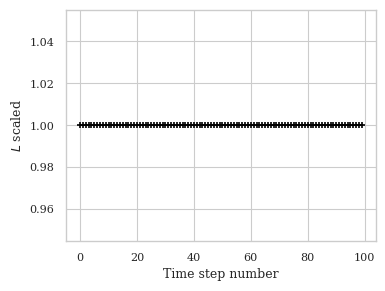

Dynamic 0


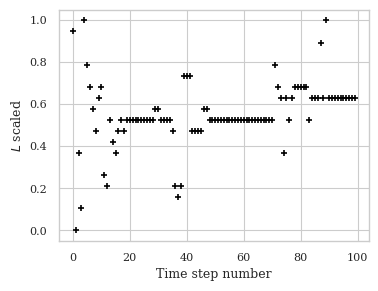

Dynamic 1


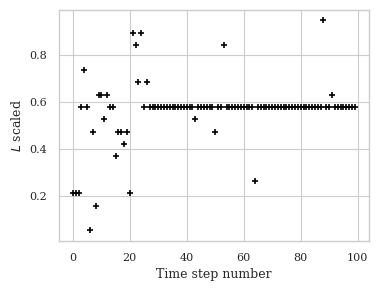

Dynamic 2


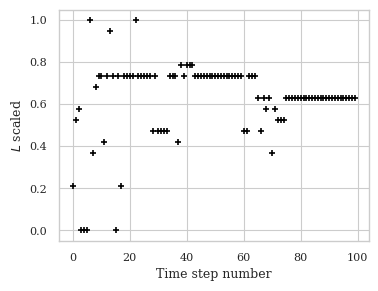

Random 0


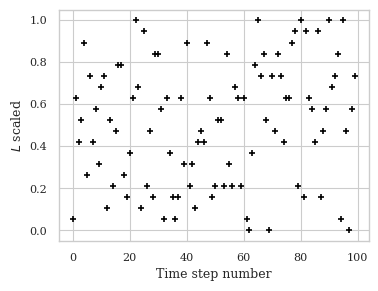

Random 1


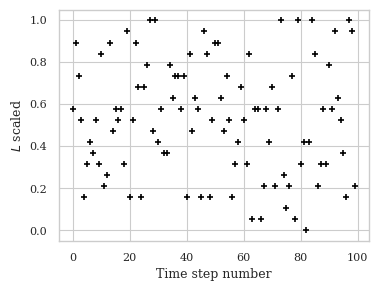

Random 2


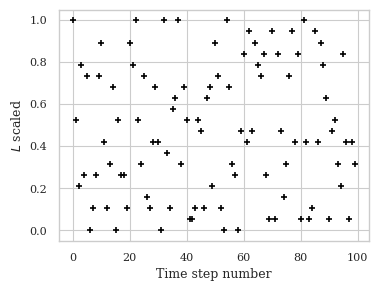

In [6]:
def make_l_factor(data: Sequence[SolverSelectionData], converged=True):
    l_factors = np.array(
        [
            x.config["gmres"]["preconditioner"]["splitting_fixed_stress"]["l_factor"]
            for x in data
        ]
    )
    if converged:
        return l_factors[make_converged_indices(data)]
    return l_factors


for name, values in data.items():
    for i, value in enumerate(values):
        print(name, i)
        plt.figure(figsize=(4, 3))
        l_factors = make_l_factor(value, converged=CONVERGED)
        plt.scatter(
            np.arange(l_factors.size), l_factors, label=name, color="black", marker="+"
        )

        plt.ylabel("$L$ scaled")
        plt.xlabel("Time step number")
        plt.show()
        if save_media_path is not None:
            plt.savefig(
                save_media_path / f"poro_lfactor_dt_{name}_{i}.pdf", bbox_inches="tight"
            )

In [9]:
for i in range(NUM_SIMS):
    for name, values in data.items():
        plt.figure()
        value = values[i]
        l_factors = make_l_factor(value)
        num_iters = make_num_linear_iters(value)
        plt.plot(num_iters, label=name, alpha=0.7)
        plt.legend()

AttributeError: 'float' object has no attribute 'num_linear_iterations'

<Figure size 640x480 with 0 Axes>

$L = L_{\mathrm{min}}$ 0


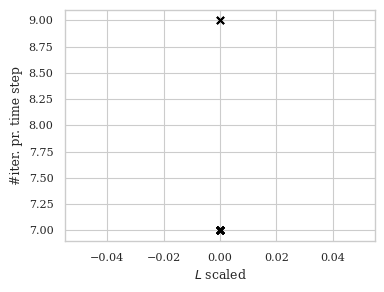

$L = L_{\mathrm{min}}$ 1


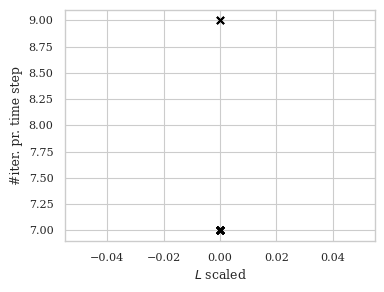

$L = L_{\mathrm{min}}$ 2


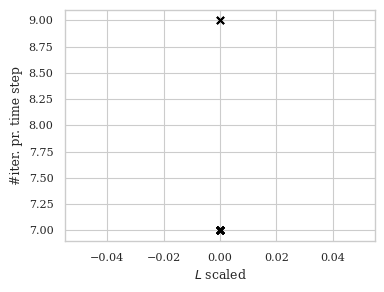

$L = L_{\mathrm{phys}}$ 0


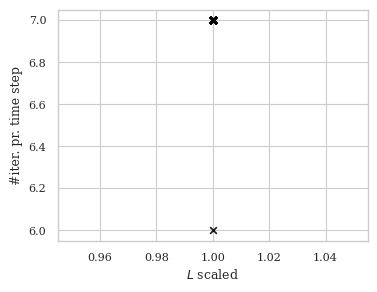

$L = L_{\mathrm{phys}}$ 1


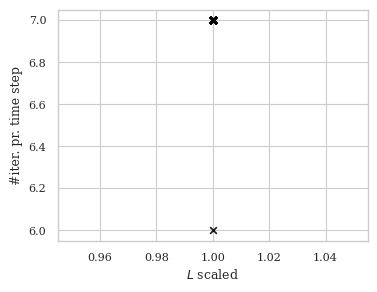

$L = L_{\mathrm{phys}}$ 2


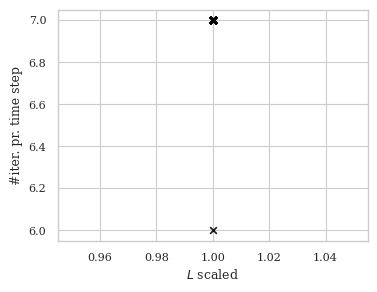

Dynamic 0


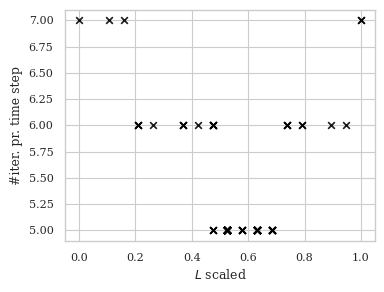

Dynamic 1


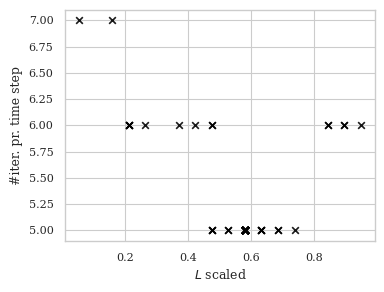

Dynamic 2


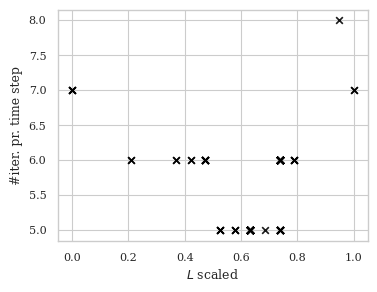

Random 0


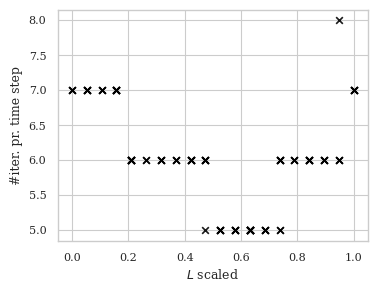

Random 1


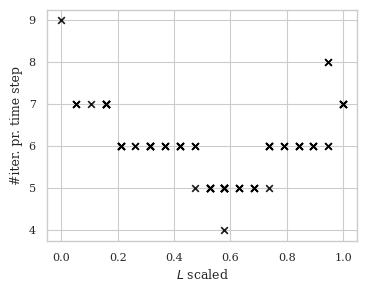

Random 2


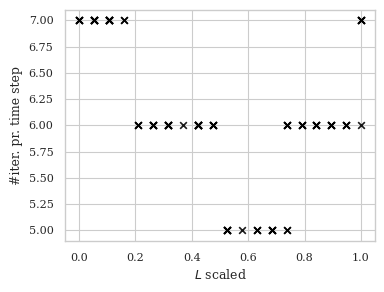

In [ ]:
for name, values in data.items():
    for i, value in enumerate(values):
        print(name, i)
        plt.figure(figsize=(4, 3))
        l_factors = make_l_factor(value)
        num_iters = make_num_linear_iters(value)
        plt.scatter(
            l_factors, num_iters, label=name, alpha=0.9, color="black", marker="x"
        )
        plt.ylabel("#iter. pr. time step")
        plt.xlabel("$L$ scaled")
        plt.show()
        if save_media_path is not None:
            plt.savefig(save_media_path / "poro_iters.pdf", bbox_inches="tight")

$L = L_{\mathrm{min}}$ 41.31337865193685 0.4810807704925537
$L = L_{\mathrm{phys}}$ 40.27667252222697 0.1925792694091797
Dynamic 33.34307893117269 2.258493423461914
Random 39.69971481959025 1.9242804050445557


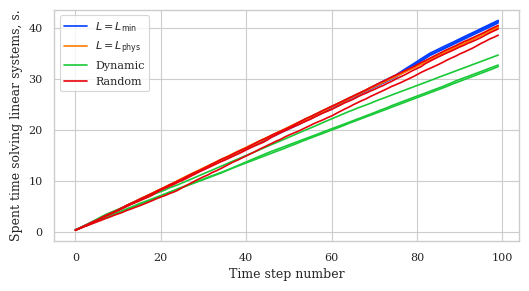

In [ ]:
color_iter = -1
plt.figure(figsize=(6, 3))
for name, values in data.items():
    results = [make_solve_linear_system_time(value) for value in values]
    color_iter += 1
    make_label = True
    total = []
    for result in results:
        result = np.cumsum(result)
        total.append(result[-1])
        if make_label:
            plt.plot(result, color=f"C{color_iter}", label=name)
            make_label = False
        else:
            plt.plot(result, color=f"C{color_iter}")

    # results = np.cumsum(results, axis=1)
    # mean = np.mean(results, axis=0)
    # max = np.max(results, axis=0)
    # min = np.min(results, axis=0)
    # plt.fill_between(np.arange(mean.size), min, max, alpha=0.5)
    # plt.plot(mean, label=name)

    print(name, np.mean(total), np.max(total) - np.min(total))

plt.legend()
plt.xlabel("Time step number")
plt.ylabel("Spent time solving linear systems, s.")
if save_media_path is not None:
    plt.savefig(save_media_path / "poro_performance.pdf", bbox_inches="tight")

In [ ]:
DAY = 24 * 60 * 60
YEAR = 365 * DAY


color_iter = -1
plt.figure(figsize=(6, 4))
for name, values in data.items():
    results = []
    times = []
    color_iter += 1

    for perf in values:
        results.append(
            np.cumsum(
                sum_per_time_step(
                    make_solve_linear_system_time(perf, converged=CONVERGED),
                    perf,
                    converged=CONVERGED,
                )
            )
        )
        times.append(make_simulation_time(perf, converged=CONVERGED))

    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, results):
        total.append(result[-1])
        t_end.append(time[-1])

        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list)
    max_ = np.max(interp_data, axis=0)
    min_ = np.min(interp_data, axis=0)
    mean = np.mean(interp_data, axis=0)
    x_space /= YEAR
    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), np.max(total) - np.min(total))
    assert np.allclose(t_end, t_end[0], rtol=1e-10)

plt.legend()
plt.xlabel("Simulation time, years")
plt.ylabel("Spent time solving linear systems, s.")

if save_media_path is not None:
    plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

NameError: name 'plt' is not defined